# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [2]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

%matplotlib inline

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [3]:
df = pd.read_csv('data/data.tsv.gz', compression='gzip', sep='\t', on_bad_lines='skip')
df

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
13492,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2
13493,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,2
13494,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13495,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

In [4]:
# Show rows with duplicated policy ID
df[df.id.duplicated(keep='first')]

# Drop rows with duplicated policy IDs in place, keep the first occurrence only
df.drop_duplicates(subset=['id'], keep='first', inplace=True) 

df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
# Globalise column name contains "base_motorcycle" and "update_motorcycle" to facilitate later use

BASE_NAME = ['baseline_motorcycle'+str(i) for i in range(1, 5)]
UPDATE_NAME = ['update_motorcycle'+str(i) for i in range(1, 5)]

In [6]:
df[[*BASE_NAME, *UPDATE_NAME]].head()

,baseline_motorcycle1,baseline_motorcycle2,baseline_motorcycle3,baseline_motorcycle4,update_motorcycle1,update_motorcycle2,update_motorcycle3,update_motorcycle4
0,896,NaN,NaN,NaN,39198,NaN,NaN,NaN
1,21396,32659.0,NaN,NaN,63511,47605.0,NaN,NaN
2,21340,44998.0,NaN,NaN,37460,59002.0,NaN,NaN
3,23912,NaN,NaN,NaN,59136,NaN,NaN,NaN
4,16862,NaN,NaN,NaN,59292,NaN,NaN,NaN


In [7]:
# Check the unique values in column "motorcycle_count"
df.motorcycle_count.unique()

# Drop rows where the number of odometer readings for each contract is not the same as the number stated in "motorcycle_count"
df = df[ df[[*BASE_NAME, *UPDATE_NAME]].notnull().sum(axis=1) == df.motorcycle_count * 2 ]

# Drop rows where the number of motorcycles recorded in baseline contracts and updated contracts are different
df = df[ df[BASE_NAME].notnull().sum(axis=1) == df[UPDATE_NAME].notnull().sum(axis=1) ]

df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


In [8]:
# Calculate the mean and the median value of each column related to kilometrages. 
# describe() function will automatically compute the mean and median, we just need to select these two rows
df.loc[:,df.columns.str.contains("_motorcycle")].describe().loc[['mean' , '50%'], :]


,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,7.413998e+14,7.413998e+14,67325.967422,92277.633144,67657.320282,92849.408771,67827.97546,93374.279141
50%,5.634150e+04,8.239750e+04,56157.500000,82061.000000,58821.000000,85645.000000,68181.00000,93387.500000


Text(0.5, 1.0, 'Distribution of the data after removing extreme outliers')

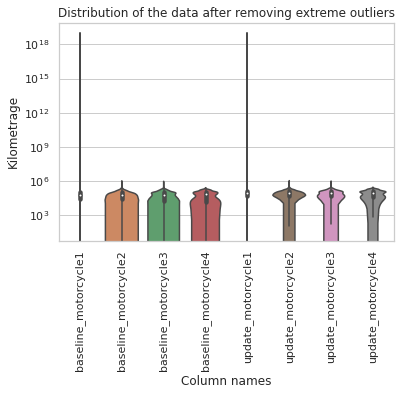

In [9]:
# Are the values obtained plausible? 
# Visualize the distribution of the data and remove any extreme outliers

sns.set(style="whitegrid")

df_viz = df[[*BASE_NAME, *UPDATE_NAME]]

a = sns.violinplot(data=df_viz)
plt.yscale('log')
plt.xticks(rotation=90)

plt.xlabel("Column names")
plt.ylabel("Kilometrage")
plt.title("Distribution of the data after removing extreme outliers")

As can be seen from the violin plot, the obtained data is not plausible because in columns related to the first motorcycle in the policy, there exists extreme outliers.

In [10]:
# 
def remove_extreme_outlier(data):
    Q1 = data[[*BASE_NAME, *UPDATE_NAME]].quantile(0.25)
    Q3 = data[[*BASE_NAME, *UPDATE_NAME]].quantile(0.75)
    
    # Create a dataframe to restore stats
    result = pd.concat([Q1, Q3], axis=1).rename(columns={0.25: "Q1", 0.75: "Q3"})
    result["up_whisker"] = result.Q3 + 3 * (result.Q3 - result.Q1)
    
    for col in [*BASE_NAME, *UPDATE_NAME]:
        # Compare values with > operand to preserve NaN values
        data.drop(data[data[col] > result["up_whisker"][col]].index, inplace=True) 
        
remove_extreme_outlier(df)

Text(0.5, 1.0, 'Distribution of the data after removing extreme outliers')

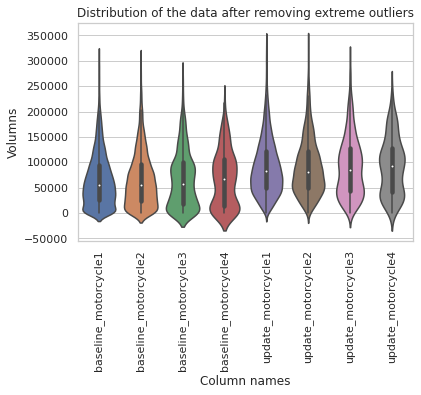

In [11]:
sns.violinplot(data=df[[*BASE_NAME, *UPDATE_NAME]])
plt.xticks(rotation=90)

plt.xlabel("Column names")
plt.ylabel("Volumns")
plt.title("Distribution of the data after removing extreme outliers")

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

In [12]:
# Create additional columns
df["baseline_average"] = df[BASE_NAME].mean(axis=1)
df["update_average"] = df[UPDATE_NAME].mean(axis=1)
df["diff_average"] = df["update_average"] - df["baseline_average"]

df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0


***Discussion 3.2***: Instead of calculating the average kilometrage for comparison, we can take the sum of kilometrage of all motorcycles insured in one policy. Although calculating the sum will not have the extreme value problem, taking the sum for comparison will significantly increase the standard deviation because adding up all data will result in increasing the kilometer difference (for policies with more & less cars, and for policies with large kilometrage values and small kiometrage values).

Text(0.5, 1.0, 'Distribution of motorcycles per policy')

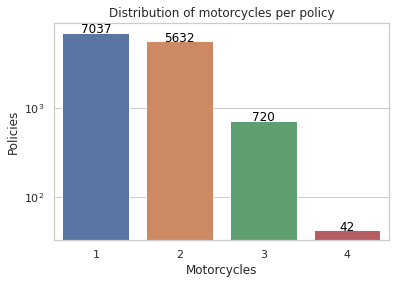

In [13]:
# Here, we are ploting the distribution as bar plot in order to add values above the bar

# Convert pandas series containing occurrence of unique values to dataframe
motorcycle_count = df.motorcycle_count.value_counts().to_frame()

sns.set(style="whitegrid")

g = sns.barplot(x=motorcycle_count.index, y=motorcycle_count.motorcycle_count)

plt.yscale('log')

# Add values above each bar
for index, row in motorcycle_count.iterrows():
    g.text(row.name-1, row.motorcycle_count, round(row.motorcycle_count,2), color='black', ha="center")
    
plt.xlabel("Motorcycles")
plt.ylabel("Policies")
plt.title("Distribution of motorcycles per policy")


In [14]:
print(f"Mean: {df.update_average.mean()}\nStandard Deviation: {df.update_average.std()}")

Mean: 91071.28505571681
Standard Deviation: 48196.96280298548


In [15]:
# Retrieve policies which has 4 motorcycles, calculate mean and std for columns related to kilometrage
# Again, we are using describe() function to calculate mean and std

df[df["motorcycle_count"] == 4][[*BASE_NAME, *UPDATE_NAME]]\
    .describe()\
    .loc[['mean' , 'std'], :]

,baseline_motorcycle1,baseline_motorcycle2,baseline_motorcycle3,baseline_motorcycle4,update_motorcycle1,update_motorcycle2,update_motorcycle3,update_motorcycle4
mean,43994.285714,96050.904762,78869.976190,103172.833333,67634.952381,121408.023810,103314.285714,129107.619048
std,38641.831242,69656.284260,58993.755792,47791.890635,42535.077744,74218.301737,64273.921056,45749.685612


**Discussion 3.6**: If we analyze the data at the motorcycle level, then as shown in the above motorcycle distribution, available motor data significantly decrease as we analyzing the third and fourth motorcycle. In this case, very large data values will dominate the average point of each motorcycle.

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

In [16]:
df_update = df[["condition" ,"update_average"]].groupby(by=["condition"]).agg(['mean', 'std'])
df_update

update_average              
                      mean           std
condition                               
Sign Bottom   97459.712480  48026.545924
Sign Top      84839.772969  47546.096929

In [17]:
# whether there is significant difference between the updated average kilometrage of two groups

stats.ttest_ind(df[df.condition == "Sign Bottom"].update_average, df[df.condition == "Sign Top"].update_average)


Ttest_indResult(statistic=15.302625208666836, pvalue=2.0318998050684443e-52)

**Discusson 3.3**: According to the results in 4.1 and 4.2, there's a significant difference between the updated kilometer average of "Sign Bottom" and "Sign Top", with the former one having a higher updated average kilometer value. This reveals that signing at the top decreases dishonesty.

**Discussion**: Given that no intervention is performed in the baseline contract, We would not expect differences between the average values between "Sign Top" & "Sign Bottom".

In [18]:
df_baseline = df[["condition" ,"baseline_average"]].groupby(by=["condition"]).agg(['mean', 'std'])
df_baseline

baseline_average              
                        mean           std
condition                                 
Sign Bottom     73791.013420  46201.483762
Sign Top        58740.780654  45620.386026

In [19]:
# whether there is significant difference between the baseline average kilometrage of two groups

stats.ttest_ind(df[df.condition == "Sign Bottom"].baseline_average, df[df.condition == "Sign Top"].baseline_average)


Ttest_indResult(statistic=18.995169305300905, pvalue=2.0494928551034416e-79)

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

Text(0.5, 1.0, 'Distribution of odometer kilometrage for the first motorcycle insured')

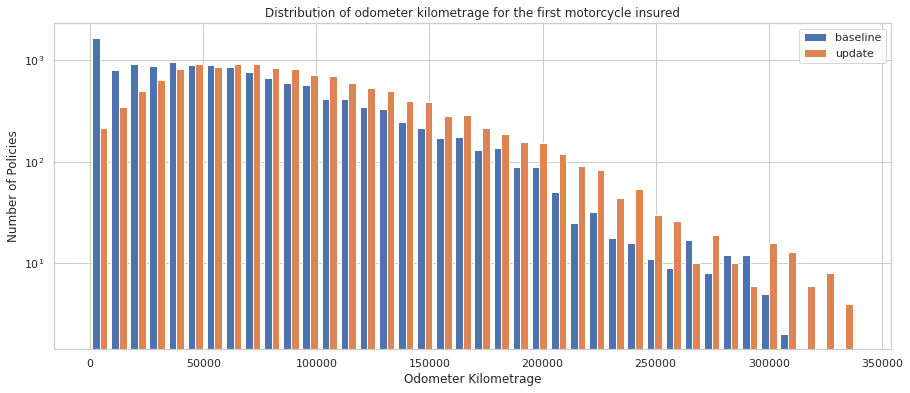

In [20]:
# Plot the distribution of odometer kilometrage reported for the first motorcycle insured

plt.figure(figsize=[15,6])
plt.hist([df.baseline_motorcycle1, df.update_motorcycle1], bins=40, label=['baseline', 'update'], log=True)
plt.legend(loc='upper right')

plt.xlabel("Odometer Kilometrage")
plt.ylabel("Number of Policies")

plt.title("Distribution of odometer kilometrage for the first motorcycle insured")

Text(0.5, 1.0, 'Difference between odometer kilometrage reported in the baseline and updated contractfor the first motorcycle insured')

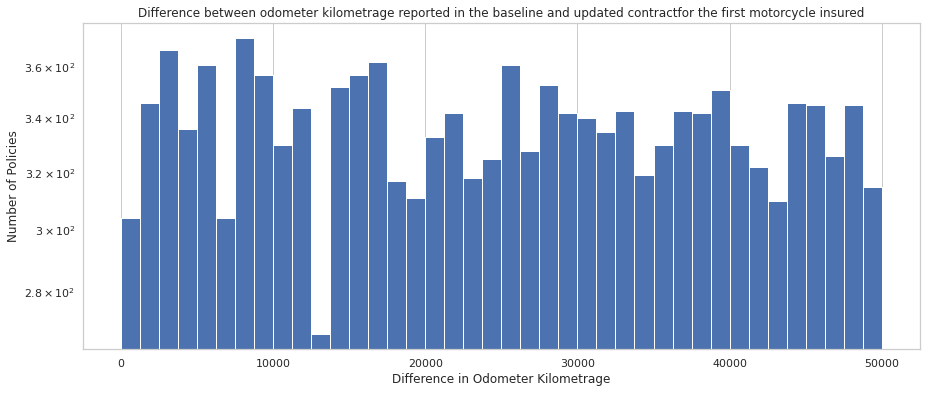

In [21]:
# plot the difference between the number of kilometers reported in the baseline and in the updated contract

plt.figure(figsize=[15,6])
plt.hist(df.update_motorcycle1 - df.baseline_motorcycle1, bins=40, label=['baseline', 'update'], log=True)

plt.xlabel("Difference in Odometer Kilometrage")
plt.ylabel("Number of Policies")

plt.title("Difference between odometer kilometrage reported in the baseline and updated contractfor the first motorcycle insured")


### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

Text(0.5, 1.0, 'Distribution of occurrences of the last three digits')

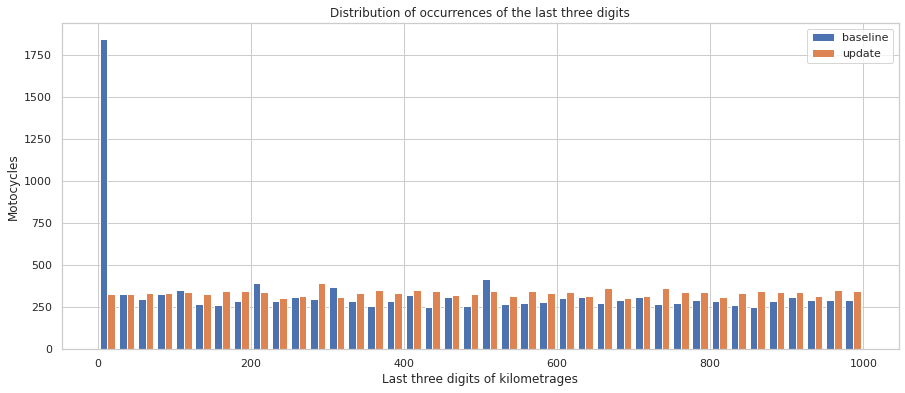

In [22]:
# plot the distribution of occurrences of the last three digits

x = df['baseline_motorcycle1'].astype(str).str[-3:].astype(int)
y = df['update_motorcycle1'].astype(str).str[-3:].astype(int)

plt.figure(figsize=[15,6])
plt.hist([x, y], bins=40, label=['baseline', 'update'])
plt.legend(loc='upper right')

plt.xlabel("Last three digits of kilometrages")
plt.ylabel("Motocycles")

plt.title("Distribution of occurrences of the last three digits")

In [23]:
# How we investigate into cause to the difference between baseline contracts and update contracts

temp = df[df['baseline_motorcycle1'].astype(str).str[-3:].astype(int) < 25]

exclude = temp[(temp['baseline_motorcycle1'] < 25) | (temp['baseline_motorcycle1'].astype(str).str[-3:] == "000")]

print("Number of policies with baseline kilometrage of first motorcycle1 < 25: {}".format(len(temp[temp["baseline_motorcycle1"] < 25])))
print("Number of policies with baseline kilometrage of first motorcycle1 end with 000: {}".format(len(temp[temp['baseline_motorcycle1'].astype(str).str[-3:] == "000"])))
print("Total number of policies with last three digit < 25: {}".format(len(temp)))



Number of policies with baseline kilometrage of first motorcycle1 < 25: 270
Number of policies with baseline kilometrage of first motorcycle1 end with 000: 1278
Total number of policies with last three digit < 25: 1844


Text(0.5, 1.0, 'Distribution of occurrences of the last three digits with new car and estimated kilometrages')

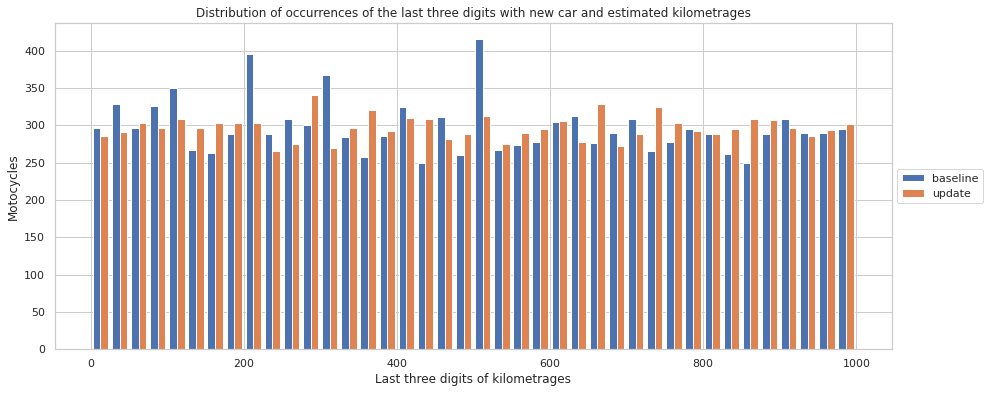

In [24]:
# After remove the detected issues mentioned above 
# We can see that the distribution of occurrences is quite similar to each other

x1 = df[~df.id.isin(exclude.id)].astype(str).baseline_motorcycle1.str[-3:].astype(int)
y1 = df[~df.id.isin(exclude.id)].astype(str).update_motorcycle1.str[-3:].astype(int)

plt.figure(figsize=[15,6])
plt.hist([x1, y1], bins=40, label=['baseline', 'update'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Last three digits of kilometrages")
plt.ylabel("Motocycles")

plt.title("Distribution of occurrences of the last three digits with new car and estimated kilometrages")

**Discussion 6.2**: The difference we observed between the two distribution is that the number of policies with last 3 digits in first motorcycle's baseline contracts less than 50 is overwhelmingly higher than in the update contracts.

**Discussion 6.3**: The plausible cause for this phonomenon is that, some individuals tend to report 000 as the last three digits for their kilometrages when they have more than 1000 kilometrages for some reason (e.g. they cannot remember the exact amount of the kilometrages) - ***1278 cases out of 2172***. Besides, we have also observed that some motorcycles have their kiloetrages less than 50, which indicates these could be new motorcycles - ***317 cases out of 2172***.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

In [25]:
# Load and merge
font = pd.read_csv('data/fonts.csv')
merged_df = pd.merge(df, font, on='id')
merged_df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0,Helvetica
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5,Helvetica
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0,Helvetica
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0,Helvetica
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0,Arial


In [26]:
# Split merged dataframe into two according to font
# Calculate the number of rows with the Arial and the Helvetica font

df_arial = merged_df[merged_df.font == "Arial"]
df_helvetica = merged_df[merged_df.font == "Helvetica"]

print(f"Number of rows with the font Arial: {len(df_arial)}\nNumber of rows with the font Helvetica {len(df_helvetica)}")

Number of rows with the font Arial: 6717
Number of rows with the font Helvetica 6714


Text(0.5, 1.0, 'distribution of baseline kilometers for rows with the Arial font and for rows with the Helvetica font')

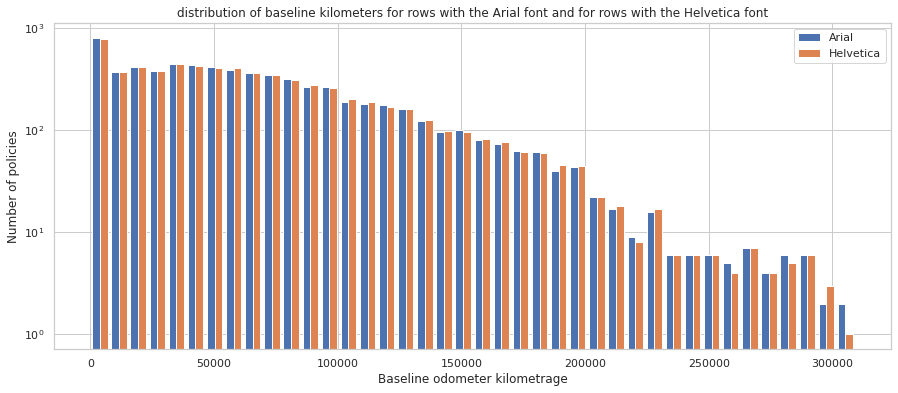

In [27]:
# Plot the distribution of baseline kilometers for rows with the Arial font and for rows with the Helvetica font

plt.figure(figsize=[15,6])
plt.hist([df_arial.baseline_motorcycle1, df_helvetica.baseline_motorcycle1], bins=40, label=['Arial', 'Helvetica'], log=True)
plt.legend(loc='upper right')

plt.xlabel("Baseline odometer kilometrage")
plt.ylabel("Number of policies")

plt.title("distribution of baseline kilometers for rows with the Arial font and for rows with the Helvetica font")


Text(0.5, 1.0, 'Distribution of the last three digits for the first motorcycle in each baseline and update contract')

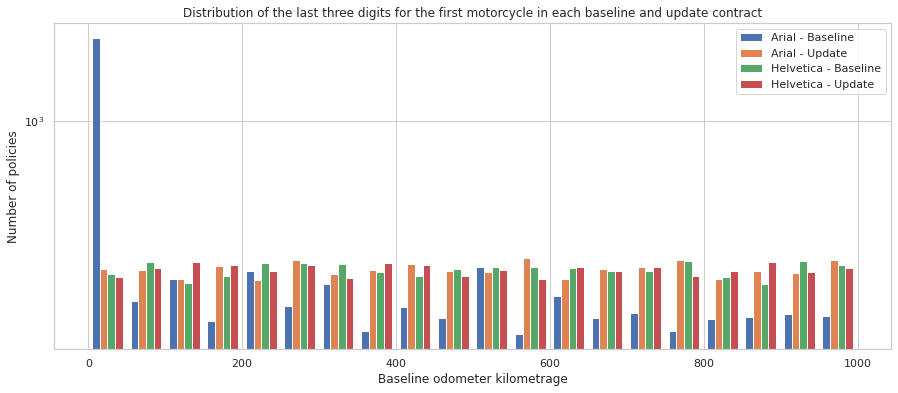

In [28]:
# Plot the last three digits for the first motorcycle in each baseline and update contract
# Also split Arial from Helvetica

plt.figure(figsize=[15,6])
plt.hist([df_arial.baseline_motorcycle1.astype(str).str[-3:].astype(int), 
          df_arial.update_motorcycle1.astype(str).str[-3:].astype(int), 
          df_helvetica.baseline_motorcycle1.astype(str).str[-3:].astype(int), 
          df_helvetica.update_motorcycle1.astype(str).str[-3:].astype(int)]
         , bins=20, label=['Arial - Baseline', 'Arial - Update', 'Helvetica - Baseline', 'Helvetica - Update'], log=True)
plt.legend(loc='upper right')

plt.xlabel("Baseline odometer kilometrage")
plt.ylabel("Number of policies")

plt.title("Distribution of the last three digits for the first motorcycle in each baseline and update contract")




In [29]:
print("Number of policies end with '000' in Arial font: {}".format(len(df_arial[df_arial.baseline_motorcycle1.astype(str).str[-3:] == "000"])))
print("Number of policies end with '000' in Helvetica font: {}".format(len(df_helvetica[df_helvetica.baseline_motorcycle1.astype(str).str[-3:] == "000"])))


Number of policies end with '000' in Arial font: 1273
Number of policies end with '000' in Helvetica font: 5


**Dicsussion 7.4**: Given that baseline contracts were signed under the same condition, from the above distribution we can easily observe the inconsistence between number of baseline contract with last three digits less than 25 signed in Arial and Helvetica font. Our inference to this question is that the left-skewed baseline distribution of the occurrence of last 3 digits for "Arial" results from insurer's unawareness of exact kilometrage value when reporting because usually we will not intentionally remember the kilometrage detail. However, the result of "Helvetica" policies showes a rather uniform baseline distribution of last 3 digits, which probably means that the data could be fabricated with hiding the occurrence of last 3 digits into the overall distribution with a uniformly distributed pattern. 

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

- In Task 5.1, we observe abnormally large odometers beyond 200,000 in update and baseline columns, which are two to three times of normal motorcycle life. After taking further analysis on the last three digits of baseline and update odometers in Task 7, we find that the distribution of last three digits has a significant difference between update and baseline. Based on the third hint, the hypothesis, proposed to explain why the number of baseline odometers less than 50 is much bigger than that of update odometers, is no longer befitting for rows with Helvetica font, which may indicate fabrication.

- Absence of decimal points might explain extremely large odometers: the actual value may lie between 20,000.0 to 30,000.0, and the decimal points were forgotten during recording. Randomly generated and uniform distributed data could account for the distribution of the last three digits of rows with Helvetica font, which is distributed in a uniform manner.

- Given the above analysis, we cannot provide the conclusion of this honesty question, even if the data is not corrupted by fabricated data. Task 4 shows there is a huge difference between the mean value of update and baseline. However, there is also a huge difference between the baseline even if the value in the baseline has nothing to do with the condition whether we sign top or sign bottom. After we filter out the Arial font arrow, the result remains the same. Another way to address this dishonesty question is to pool across the single motorcycle as indicated in Task 3.5. For this method, we find no significant difference between baseline and update odometer within a single motorcycle. To sum up, neither of the methods can provide a valid support for the question. 

In [34]:
#filter out the Arial font and check again for task 4.2 and 4.4, 4.5
merged_df.drop(merged_df[merged_df.font=='Helvetica'].index, inplace=True)

merged_df

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0,Arial
5,Sign Top,6,147738,167895,125820.0,164688.0,NaN,NaN,NaN,NaN,2,136779.0,166291.5,29512.5,Arial
6,Sign Bottom,7,18780,49811,45402.0,54824.0,NaN,NaN,NaN,NaN,2,32091.0,52317.5,20226.5,Arial
7,Sign Top,8,41930,80323,181416.0,229852.0,NaN,NaN,NaN,NaN,2,111673.0,155087.5,43414.5,Arial
9,Sign Bottom,10,78382,127817,NaN,NaN,NaN,NaN,NaN,NaN,1,78382.0,127817.0,49435.0,Arial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13419,Sign Top,13477,0,3630,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,3630.0,3630.0,Arial
13420,Sign Bottom,13478,100467,117836,NaN,NaN,20.0,32650.0,NaN,NaN,2,50243.5,75243.0,24999.5,Arial
13421,Sign Top,13479,250,10476,NaN,NaN,NaN,NaN,NaN,NaN,1,250.0,10476.0,10226.0,Arial
13423,Sign Bottom,13481,59624,71545,NaN,NaN,NaN,NaN,140198.0,151643.0,2,99911.0,111594.0,11683.0,Arial


In [37]:
#stats for 4 motorcycles 
stats_4_new = merged_df[merged_df['motorcycle_count']==4]
stats_4_new.loc[:,merged_df.columns.str.contains("_motorcycle")].describe().loc[['mean','std']]

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,43688.714286,67394.095238,95832.857143,121381.904762,78636.857143,102210.904762,102960.761905,131198.428571
std,39136.468381,44290.605849,70536.938072,70087.244538,59732.523462,66229.412258,48392.423298,45657.959023


In [39]:
stats_update_new = merged_df[['condition','update_average']].groupby(by='condition').agg(['mean','std'])
stats_update_new

update_average              
                      mean           std
condition                               
Sign Bottom   97209.347885  48252.884563
Sign Top      84603.240290  47737.322669

In [45]:
# Significant kilometrage difference between update average of sign bottom & sign top in Arial
stats.ttest_ind(merged_df[merged_df.condition == 'Sign Bottom']['update_average'],
                 merged_df[merged_df.condition == 'Sign Top']['update_average'])

Ttest_indResult(statistic=10.762765996633089, pvalue=8.527540007452343e-27)

In [46]:
stats_base_new=merged_df[['condition','baseline_average']].groupby(by='condition').agg(['mean','std'])
stats_base_new

baseline_average              
                        mean           std
condition                                 
Sign Bottom     73450.574723  46305.394698
Sign Top        58620.650597  45575.754059

In [49]:
# Significant kilometrage difference between baseline average of sign bottom & sign top in Arial
stats.ttest_ind(merged_df[merged_df.condition == 'Sign Bottom']['baseline_average'],
                 merged_df[merged_df.condition == 'Sign Top']['baseline_average'])

Ttest_indResult(statistic=13.227903742173718, pvalue=1.8806651316015272e-39)